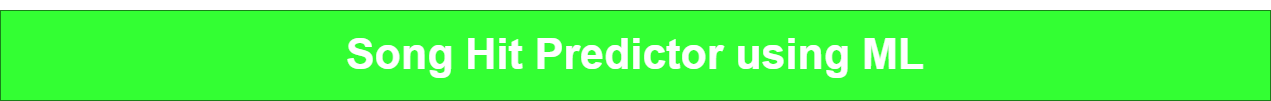

By:


*   Daksh Khurana
*   Daryl Jacob Jerrish
*   Rahul Airan



# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler   

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import keras
from keras.models import Sequential 
from keras.layers import InputLayer 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.constraints import maxnorm

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/MyDrive/data_new.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

# **Cleaning**

Looking closely at the features, there are some features to consider whether to include in the final model or not:

**id**: id is unique for each track, therfore cannot assist a model and will be dropped.

**name**: There are 137,013 unique values. In our opinion, this is a problematic categorical feature to insert in a model, and will be dropped.

**artists**: there are 36,195 unique features. Since we enticipate the artist will influence the popularity of the track, this feature will remain and be handled seperatley.

**release_date \ year**: The year feature is a derivative to the release_date feature, therfore one of them should be excluded. Since the release date contains rows with full date and others with year only, the release_date will be dropped.

In [ ]:
columns = ['id', 'name', 'artists', 'release_date', 'year']
for col in columns:
  print(f'{col:<15}: {df[col].nunique()} unique values')

id             : 172230 unique values
name           : 137013 unique values
artists        : 36195 unique values
release_date   : 11043 unique values
year           : 102 unique values


In [ ]:
df = df.drop(labels=['id', 'name', 'release_date'], axis=1)
df.shape

(174389, 16)

## **Duplicates & Nulls**
Before the above features were dropped, there weren't any duplicates in the data set, due to the unique id feature.


In [ ]:
df.duplicated().sum()

3452

After the removal of the above mentioned features , there are 3452 duplicates in the dataset.

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Only the first copy of the duplicate will remain for the model.

In [ ]:
df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

Now, there aren't any null values in the data set.

In [ ]:
df

acousticness                                   artists  ...  valence  year
0           0.991000                           ['Mamie Smith']  ...   0.6340  1920
1           0.643000                 ["Screamin' Jay Hawkins"]  ...   0.9500  1920
2           0.993000                           ['Mamie Smith']  ...   0.6890  1920
3           0.000173                       ['Oscar Velazquez']  ...   0.0422  1920
4           0.295000                                  ['Mixe']  ...   0.2990  1920
...              ...                                       ...  ...      ...   ...
174369      0.995000  ['Ludovico Einaudi', 'Johannes Bornlöf']  ...   0.0678  2021
174371      0.995000  ['Ludovico Einaudi', 'Johannes Bornlöf']  ...   0.1510  2021
174375      0.988000  ['Ludovico Einaudi', 'Johannes Bornlöf']  ...   0.0373  2021
174377      0.795000                          ['Alessia Cara']  ...   0.2280  2021
174387      0.920000                          ['Taylor Swift']  ...   0.3200  2021

[170937 rows x 16 columns]

# **Exploratory Data Analysis**

### **Ojectives**


1.   Study the distribution and type of values is each column of the dataset.
  
2.   Study the correlation between all pairs of attributes.

3.   Find the top 10 popular artists.

4.   Analysing the different Eras of Music.

5.   Classifying Songs on Basis of Popularity

6.   Bivariate Analysis of Popularity vs Other Attributes



### **Overview of Column Types**

In [ ]:
numeric_columns = df.columns[df.dtypes != 'object']
string_columns = df.columns[df.dtypes == 'object']
print(f'There are {len(numeric_columns)} numeric columns & {len(string_columns)} string columns')

There are 15 numeric columns & 1 string columns


### **1. Numerical Columns Histogram**
Distribution of numerical values in each column is shown using histograms.

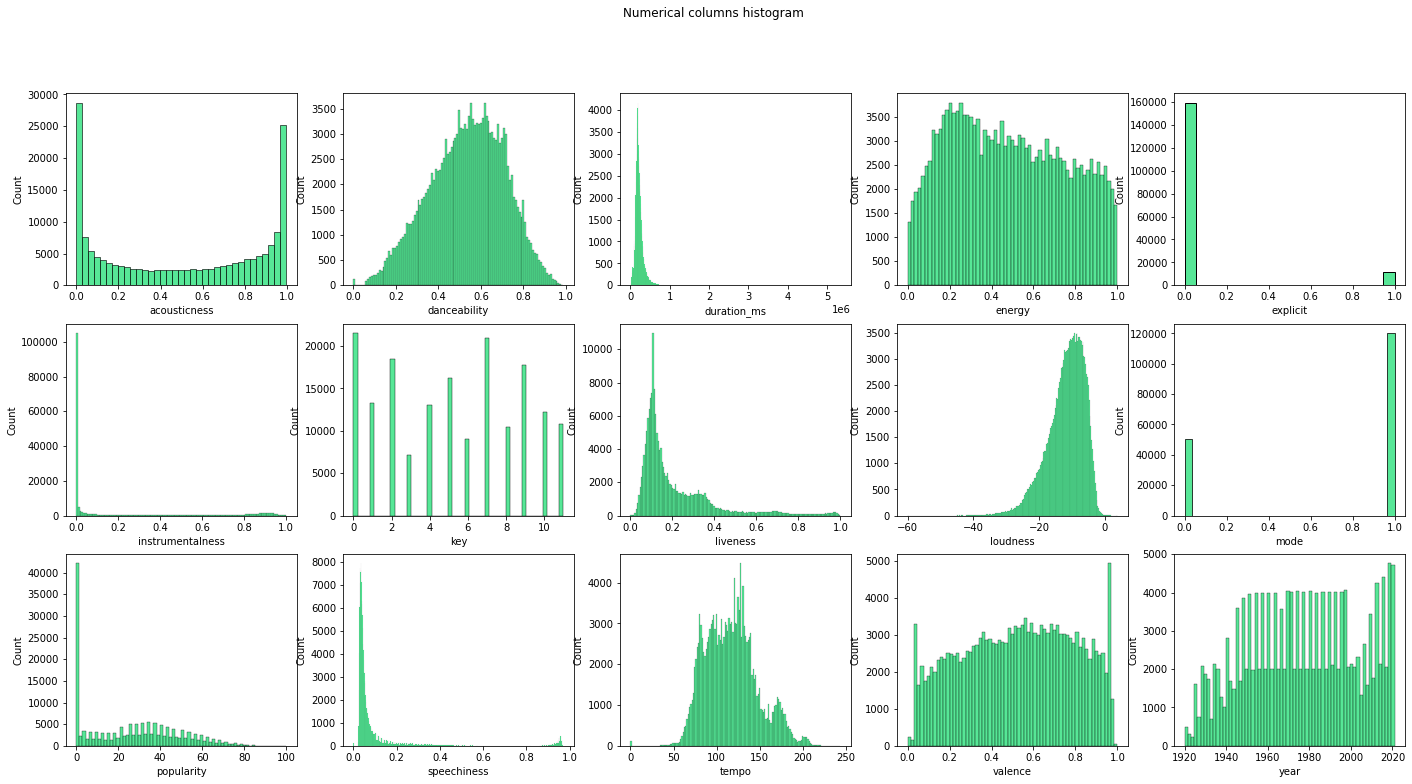

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(24, 12))

fig.suptitle('Numerical columns histogram')

i=0;
j=0;

for key in numeric_columns:
    sns.histplot(data=df[key],ax=axes[i,j], color = "#1fe074")
    if(j<4):
        j=j+1
    elif(j==4):
        j=0;
        i=i+1


### **2. Correlation between all pairs of attributes**

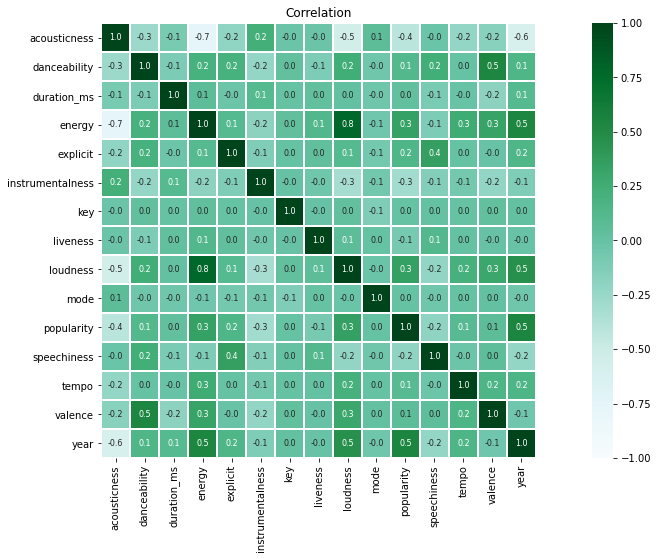

In [ ]:
# finding correlation
corr = df.corr()
# visualizing correlaiton with heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0,linewidth=.5,square=True, annot = True, annot_kws = {'size':8},fmt='.1f', cmap='BuGn')
plt.title('Correlation')
plt.show()

**Insights**

The most linear correlated features to POPULARITY are:

In [ ]:
series = np.abs(corr['popularity']).sort_values(ascending=False)
for i, row in enumerate(series):
    if 0.2 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

year              -->  0.55 (abs)
acousticness      -->  0.41 (abs)
loudness          -->  0.35 (abs)
energy            -->  0.34 (abs)
instrumentalness  -->  0.30 (abs)
speechiness       -->  0.20 (abs)


### **3. Top 10 Popular Artists**

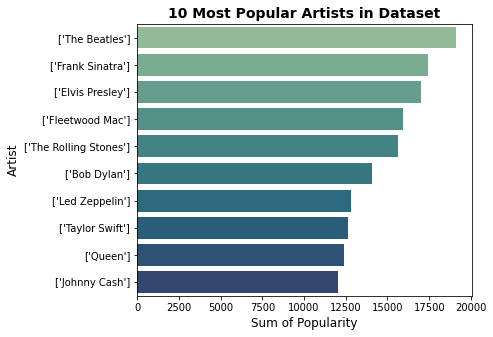

In [ ]:
fig, ax = plt.subplots(figsize = (6, 5))
lead_artists = df.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="crest", orient="h", ax=ax)
ax.set_xlabel('Sum of Popularity', c='black', fontsize=12)
ax.set_ylabel('Artist', c='black', fontsize=12)
ax.set_title('10 Most Popular Artists in Dataset', c='black', fontsize=14, weight = 'bold')
plt.show()

### **4. Eras of Music**

Using pie-chart to represent the number of songs in different eras of music.

In [ ]:
def which_year(df):
    if df>1920 and df<=1945:
        return "Post-Great War"
    if df>1945 and df<=1970:
        return "Retro"
    if df>1970 and df<=1995:
        return "Modern"
    else:
        return "Post-Modern"
df['era'] = df['year'].apply(which_year)
px.pie(data_frame = df, names = 'era', hole = 0.4, title = 'Eras of Music', color_discrete_sequence=px.colors.sequential.Tealgrn)

**Insights**



*   There is a significant rise in number of songs after the "Post Great War" Era.
*   There hasn't been significant change in the amount of songs since the "Retro" Era.



### **5. Classifying Songs on Basis of Popularity**

Using pie chart to classify songs into 4 categories on basis of the popularity score.

In [ ]:
def classify_by_popularity(x):
    if x > 75:
        return 'Very Popular'
    elif x > 50 and x < 76:
        return 'Popular'
    elif x > 25 and x < 51:
        return 'Average'
    else:
        return 'Not popular'
df['isPopular'] = df['popularity'].apply(classify_by_popularity)
px.pie(data_frame = df, names = 'isPopular', hole = 0.4, title = 'Popularity', color_discrete_sequence=px.colors.sequential.algae)

**Insights**



*   Half of the total songs have popularity rating less than 25 and are "Not Popular". 
*   Only around 15% of the songs become popular.
*   Out of the 15% popular songs, less than 1% of the songs are able to make their place in the "Very Popular" category.



### **6. Bivariate Analysis of Popularity vs Other Attributes**



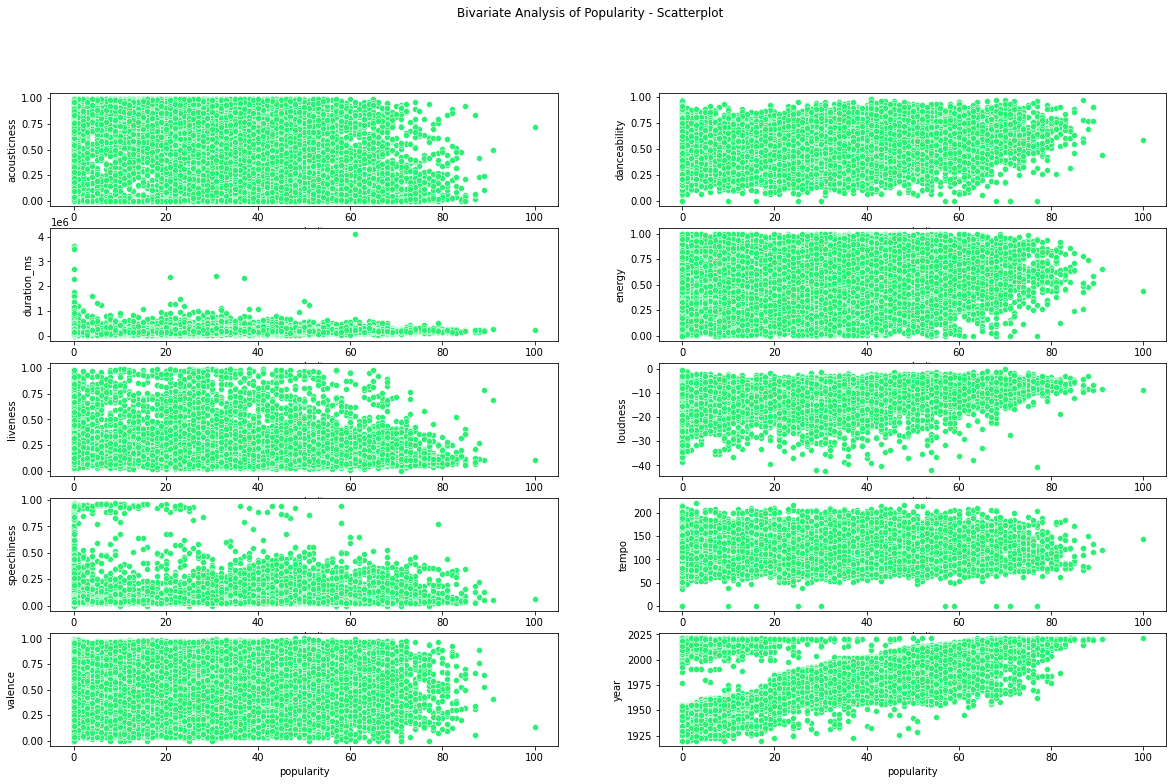

In [ ]:
temp, df1 = train_test_split(df, test_size=0.1)

fig, axes = plt.subplots(5, 2, figsize=(20, 12))

fig.suptitle('Bivariate Analysis of Popularity - Scatterplot')

i=0;
j=0;

numeric_columns1 = numeric_columns.copy()
numeric_columns1 = numeric_columns1.drop(['popularity','explicit','key','mode', 'instrumentalness'])

# numeric_columns1.all()

for key in numeric_columns1:
    sns.scatterplot(data=df1, x=df1['popularity'], y=key,ax=axes[i,j] ,color = "#2af074")
    if(j<1):
        j=j+1
    elif(j==1):
        j=0;
        i=i+1
    if i==2 and j==3:
      break

**Insights**

* Acousticness vs Popularity : More songs with popularity 60 or above tend to have low values of acousticness, 0 - 0.4 .
* Danceability vs Popularity : Popular songs (>60) tend to have values of danceability between 0.4 - 0.8 .
* Duration vs Popularity : Most Popular songs have duration of 2-5 minutes.
* Energy vs Popularity : Popularity values are a little bit higher in the second half of the plot (0.5 - 1).
Instrumentalness vs Popularity : Most Popular songs have low values of instrumentalness (0 - 0.1).
* Liveness vs Popularity : Most Popular songs have values between 0 and 0.4.
* Loudness vs Popularity : Most Popular songs have values between -20 and 0 db.
* Speechiness vs Popularity : Tracks with low speechiness tend to be more popular.
* Tempo vs Popularity : Tracks with tempo between 60 and 200 are more popular.
* Valence vs Popularity : Can't distinguish any correlation with the popularity.
* Year vs Popularity : Songs popularity is correlated with the year of the song. Newer songs have more popularity which is normal.

# **Data Loading for Models** 

In [ ]:
data = df

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170937 entries, 0 to 174387
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      170937 non-null  float64
 1   artists           170937 non-null  object 
 2   danceability      170937 non-null  float64
 3   duration_ms       170937 non-null  int64  
 4   energy            170937 non-null  float64
 5   explicit          170937 non-null  int64  
 6   instrumentalness  170937 non-null  float64
 7   key               170937 non-null  int64  
 8   liveness          170937 non-null  float64
 9   loudness          170937 non-null  float64
 10  mode              170937 non-null  int64  
 11  popularity        170937 non-null  int64  
 12  speechiness       170937 non-null  float64
 13  tempo             170937 non-null  float64
 14  valence           170937 non-null  float64
 15  year              170937 non-null  int64  
 16  era               17

In [ ]:
!ls

drive  sample_data


In [ ]:
data.head(21)

acousticness                            artists  ...          era    isPopular
0       0.991000                    ['Mamie Smith']  ...  Post-Modern  Not popular
1       0.643000          ["Screamin' Jay Hawkins"]  ...  Post-Modern  Not popular
2       0.993000                    ['Mamie Smith']  ...  Post-Modern  Not popular
3       0.000173                ['Oscar Velazquez']  ...  Post-Modern  Not popular
4       0.295000                           ['Mixe']  ...  Post-Modern  Not popular
5       0.996000  ['Mamie Smith & Her Jazz Hounds']  ...  Post-Modern  Not popular
6       0.992000                    ['Mamie Smith']  ...  Post-Modern  Not popular
7       0.996000  ['Mamie Smith & Her Jazz Hounds']  ...  Post-Modern  Not popular
8       0.996000               ['Francisco Canaro']  ...  Post-Modern  Not popular
9       0.006820                         ['Meetya']  ...  Post-Modern  Not popular
10      0.952000                       ['Dorville']  ...  Post-Modern  Not popular
11      0.996000               ['Francisco Canaro']  ...  Post-Modern  Not popular
12      0.992000                       ['Ka Koula']  ...  Post-Modern  Not popular
13      0.004780                       ['Justrock']  ...  Post-Modern  Not popular
14      0.993000                 ['Takis Nikolaou']  ...  Post-Modern  Not popular
15      0.979000            ['Aggeliki Karagianni']  ...  Post-Modern  Not popular
16      0.972000               ['Giorgos Katsaros']  ...  Post-Modern  Not popular
17      0.996000               ['Francisco Canaro']  ...  Post-Modern  Not popular
18      0.750000               ['Giorgos Katsaros']  ...  Post-Modern  Not popular
19      0.993000                    ['Amalia Vaka']  ...  Post-Modern  Not popular
20      0.023900              ['Ron van der Kraan']  ...  Post-Modern  Not popular

[21 rows x 18 columns]

In [ ]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
popularity          0
speechiness         0
tempo               0
valence             0
year                0
era                 0
isPopular           0
dtype: int64

# **Data Processing**

In [ ]:
data.popularity[data.popularity>=50].count()

28663

In [ ]:
data.popularity = np.where((data.popularity<50),0,data.popularity)
data.popularity = np.where((data.popularity>=50),1,data.popularity)

In [ ]:
data.popularity

0         0
1         0
2         0
3         0
4         0
         ..
174369    0
174371    0
174375    0
174377    0
174387    1
Name: popularity, Length: 170937, dtype: int64

In [ ]:
data.popularity

0         0
1         0
2         0
3         0
4         0
         ..
174369    0
174371    0
174375    0
174377    0
174387    1
Name: popularity, Length: 170937, dtype: int64

In [ ]:
data.popularity[data.popularity==1].count()

28663

Outlier Checking

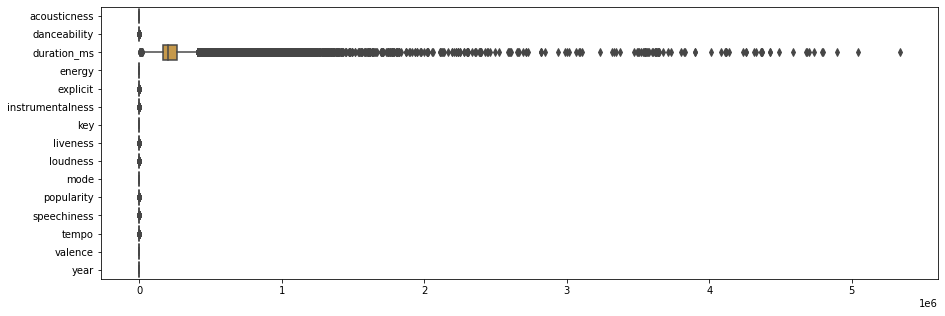

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')
plt.show()

As the duration_ms contains lots of outliers and is of less importance wrt to domain so dropping that column

In [ ]:
data.drop(columns=['artists','duration_ms','era','isPopular'],inplace=True)

Valid Outlier Checking from Domain Prespective

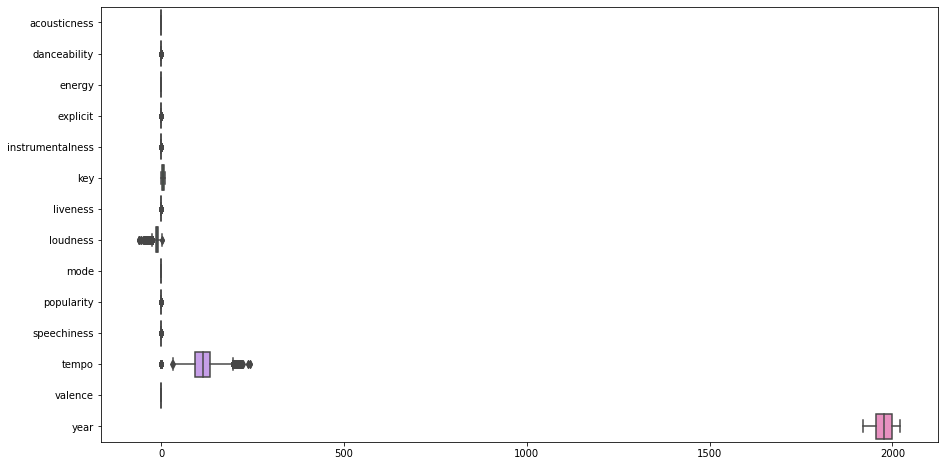

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,orient='h')
plt.show()

The loudness , tempo have valid outliers wrt to the domain knowledge

In [ ]:
#Reset the index
#1. Creating new index array
indexColArray = np.array(list(range(0, len(data))))

#2. Assign the above array to my df
data.set_index(indexColArray, inplace=True)

In [ ]:
data

acousticness  danceability  energy  ...    tempo  valence  year
0           0.991000         0.598  0.2240  ...  149.976   0.6340  1920
1           0.643000         0.852  0.5170  ...   86.889   0.9500  1920
2           0.993000         0.647  0.1860  ...   97.600   0.6890  1920
3           0.000173         0.730  0.7980  ...  127.997   0.0422  1920
4           0.295000         0.704  0.7070  ...  122.076   0.2990  1920
...              ...           ...     ...  ...      ...      ...   ...
170932      0.995000         0.297  0.0287  ...  141.636   0.0678  2021
170933      0.995000         0.343  0.0165  ...  126.970   0.1510  2021
170934      0.988000         0.316  0.0573  ...   81.070   0.0373  2021
170935      0.795000         0.429  0.2110  ...   94.710   0.2280  2021
170936      0.920000         0.462  0.2400  ...  171.319   0.3200  2021

[170937 rows x 14 columns]

In [ ]:
data.describe()

acousticness   danceability  ...        valence           year
count  170937.000000  170937.000000  ...  170937.000000  170937.000000
mean        0.501842       0.536097  ...       0.525797    1976.537268
std         0.378950       0.175598  ...       0.264170      26.590087
min         0.000000       0.000000  ...       0.000000    1920.000000
25%         0.091600       0.414000  ...       0.312000    1955.000000
50%         0.523000       0.547000  ...       0.538000    1977.000000
75%         0.895000       0.668000  ...       0.745000    1998.000000
max         0.996000       0.988000  ...       1.000000    2021.000000

[8 rows x 14 columns]

In [ ]:
X = data.drop(columns=['popularity'])
y = data.popularity

In [ ]:
X

acousticness  danceability  energy  ...    tempo  valence  year
0           0.991000         0.598  0.2240  ...  149.976   0.6340  1920
1           0.643000         0.852  0.5170  ...   86.889   0.9500  1920
2           0.993000         0.647  0.1860  ...   97.600   0.6890  1920
3           0.000173         0.730  0.7980  ...  127.997   0.0422  1920
4           0.295000         0.704  0.7070  ...  122.076   0.2990  1920
...              ...           ...     ...  ...      ...      ...   ...
170932      0.995000         0.297  0.0287  ...  141.636   0.0678  2021
170933      0.995000         0.343  0.0165  ...  126.970   0.1510  2021
170934      0.988000         0.316  0.0573  ...   81.070   0.0373  2021
170935      0.795000         0.429  0.2110  ...   94.710   0.2280  2021
170936      0.920000         0.462  0.2400  ...  171.319   0.3200  2021

[170937 rows x 13 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_test

acousticness  danceability  energy  ...    tempo  valence  year
33772        0.03990         0.399   0.716  ...  138.992    0.398  1994
159693       0.39700         0.462   0.546  ...  132.577    0.615  1963
62713        0.95300         0.553   0.344  ...  116.959    0.598  1955
75654        0.46500         0.802   0.839  ...   94.997    0.861  2021
168628       0.08420         0.580   0.501  ...  126.974    0.039  2009
...              ...           ...     ...  ...      ...      ...   ...
146600       0.00514         0.245   0.900  ...  113.805    0.475  1972
110273       0.99400         0.257   0.336  ...  132.220    0.202  1948
139544       0.10800         0.891   0.580  ...  115.789    0.945  2015
31800        0.06430         0.573   0.778  ...  136.797    0.384  1984
169523       0.21700         0.721   0.539  ...   81.971    0.377  2013

[17094 rows x 13 columns]

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
X_test

0         1         2   ...        10        11        12
0     -1.219377 -0.781702  0.865647  ...  0.727730 -0.484531  0.656779
1     -0.276829 -0.423199  0.239733  ...  0.515785  0.336240 -0.508873
2      1.190705  0.094639 -0.504000  ... -0.000219  0.271940 -0.809687
3     -0.097347  1.511579  1.318514  ... -0.725822  1.266700  1.672024
4     -1.102449  0.248283  0.074050  ...  0.330667 -1.842397  1.220804
...         ...       ...       ...  ...       ...       ...       ...
17089 -1.311124 -1.658043  1.543106  ... -0.104424 -0.193290 -0.170458
17090  1.298923 -1.589757 -0.533455  ...  0.503990 -1.225873 -1.072899
17091 -1.039630  2.018036  0.364916  ... -0.038875  1.584418  1.446414
17092 -1.154974  0.208449  1.093921  ...  0.655210 -0.537484  0.280762
17093 -0.751930  1.050647  0.213960  ... -1.156189 -0.563960  1.371211

[17094 rows x 13 columns]

Checking for balanced or unbalanced data set

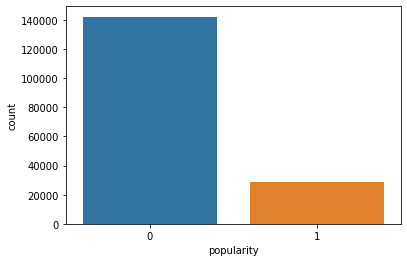

In [ ]:
sns.countplot(x='popularity',data=data)

#**Logistic Regression**

In [ ]:
lr = LogisticRegression()
%time lr_model = lr.fit(X_train, y_train)

lr_score = lr.score(X_train, y_train)*100
lr_score2 = lr.score(X_test, y_test)*100

print("Training set accuracy: ", '%.1f'%(lr_score))
print("Test set accuracy: ", '%.1f'%(lr_score2))

CPU times: user 638 ms, sys: 415 ms, total: 1.05 s
Wall time: 560 ms
Training set accuracy:  85.6
Test set accuracy:  85.4


In [ ]:
lr_y_pred_test = lr.predict(X_test)

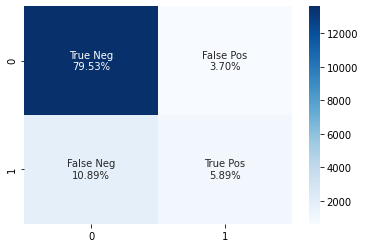

In [ ]:
lr_cm = confusion_matrix(y_test, lr_y_pred_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     lr_cm.flatten()/np.sum(lr_cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(lr_cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
pd.crosstab(y_test,lr_y_pred_test,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted      0     1    All
True                         
0          13595   632  14227
1           1861  1006   2867
All        15456  1638  17094

Text(33.0, 0.5, 'Actual Label')

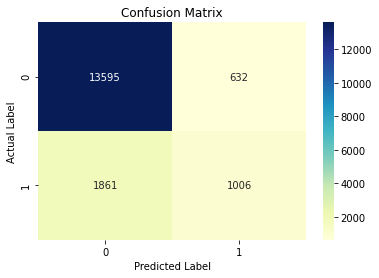

In [ ]:
cnf_matrix = confusion_matrix(y_test,lr_y_pred_test)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     14227
           1       0.61      0.35      0.45      2867

    accuracy                           0.85     17094
   macro avg       0.75      0.65      0.68     17094
weighted avg       0.84      0.85      0.84     17094



#**Decision Trees**

In [ ]:
dt = DecisionTreeClassifier(random_state = 15)
%time dt_model = dt.fit(X_train, y_train)

dt_score = dt.score(X_train, y_train)*100
dt_score2 = dt.score(X_test, y_test)*100

print("Training set accuracy: ", '%.1f'%(dt_score))
print("Test set accuracy: ", '%.1f'%(dt_score2))

CPU times: user 2.54 s, sys: 3.96 ms, total: 2.55 s
Wall time: 2.57 s
Training set accuracy:  99.8
Test set accuracy:  81.9


In [ ]:
dt_y_pred_test = dt.predict(X_test)

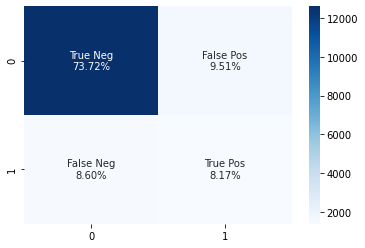

In [ ]:
dt_cm = confusion_matrix(y_test, dt_y_pred_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     dt_cm.flatten()/np.sum(dt_cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(dt_cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
pd.crosstab(y_test,dt_y_pred_test,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted      0     1    All
True                         
0          12601  1626  14227
1           1470  1397   2867
All        14071  3023  17094

Text(33.0, 0.5, 'Actual Label')

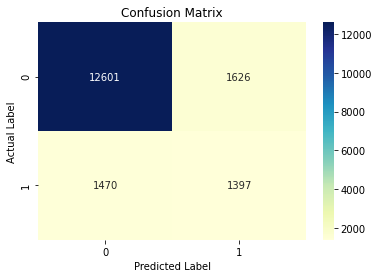

In [ ]:
cnf_matrix = confusion_matrix(y_test,dt_y_pred_test)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89     14227
           1       0.46      0.49      0.47      2867

    accuracy                           0.82     17094
   macro avg       0.68      0.69      0.68     17094
weighted avg       0.82      0.82      0.82     17094



# **Random Forests**

In [ ]:
rf = RandomForestClassifier(n_estimators=140, random_state=30)
%time rf_model = rf.fit(X_train, y_train)

rf_score = rf.score(X_train, y_train)*100
rf_score2 = rf.score(X_test, y_test)*100

print("Training set accuracy: ", '%.1f'%(rf_score))
print("Test set accuracy: ", '%.1f'%(rf_score2))

CPU times: user 55.7 s, sys: 281 ms, total: 55.9 s
Wall time: 55.6 s
Training set accuracy:  99.8
Test set accuracy:  88.0


In [ ]:
rf_y_pred_test = rf.predict(X_test)

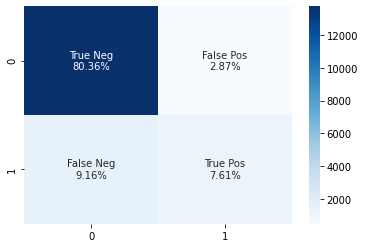

In [ ]:
rf_cm = confusion_matrix(y_test, rf_y_pred_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     rf_cm.flatten()/np.sum(rf_cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(rf_cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
pd.crosstab(y_test,rf_y_pred_test,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted      0     1    All
True                         
0          13736   491  14227
1           1566  1301   2867
All        15302  1792  17094

Text(33.0, 0.5, 'Actual Label')

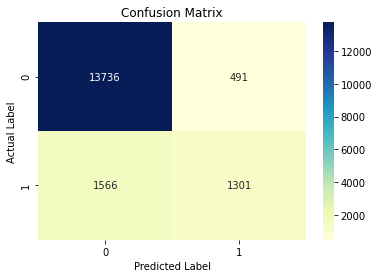

In [ ]:
cnf_matrix = confusion_matrix(y_test,rf_y_pred_test)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     14227
           1       0.73      0.45      0.56      2867

    accuracy                           0.88     17094
   macro avg       0.81      0.71      0.74     17094
weighted avg       0.87      0.88      0.87     17094



# **Neural Networks**

In [ ]:
nn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(13,)),
    keras.layers.Dense(16, activation='relu'),
	keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001)

In [ ]:
nn_model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics=['accuracy'])

Epoch 1/20
4808/4808 [==============================] - 8s 1ms/step - loss: 0.3626 - accuracy: 0.8351 - val_loss: 0.3126 - val_accuracy: 0.8649
Epoch 2/20
4808/4808 [==============================] - 7s 1ms/step - loss: 0.3087 - accuracy: 0.8673 - val_loss: 0.3092 - val_accuracy: 0.8676
Epoch 3/20
4808/4808 [==============================] - 6s 1ms/step - loss: 0.3074 - accuracy: 0.8677 - val_loss: 0.3081 - val_accuracy: 0.8681
Epoch 4/20
4808/4808 [==============================] - 7s 1ms/step - loss: 0.3035 - accuracy: 0.8713 - val_loss: 0.3032 - val_accuracy: 0.8713
Epoch 5/20
4808/4808 [==============================] - 6s 1ms/step - loss: 0.3004 - accuracy: 0.8727 - val_loss: 0.3029 - val_accuracy: 0.8708
Epoch 6/20
4808/4808 [==============================] - 7s 1ms/step - loss: 0.2988 - accuracy: 0.8732 - val_loss: 0.3003 - val_accuracy: 0.8717
Epoch 7/20
4808/4808 [==============================] - 7s 1ms/step - loss: 0.2992 - accuracy: 0.8739 - val_loss: 0.3007 - val_accuracy:

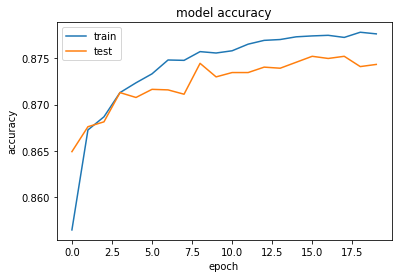

In [ ]:
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [ ]:
nn_y_pred_test = nn_model.predict(X_test)
nn_y_pred_test = [1 if x>=0.5 else 0 for x in nn_y_pred_test]

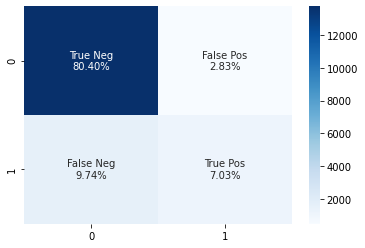

In [ ]:
nn_cm = confusion_matrix(y_test, nn_y_pred_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     nn_cm.flatten()/np.sum(nn_cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]

labels = np.asarray(labels).reshape(2,2)


sns.heatmap(nn_cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,nn_y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     14227
           1       0.71      0.42      0.53      2867

    accuracy                           0.87     17094
   macro avg       0.80      0.69      0.73     17094
weighted avg       0.86      0.87      0.86     17094



In [ ]:
nn_y_pred_test=np.array(nn_y_pred_test)
pd.crosstab(y_test,nn_y_pred_test,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted      0     1    All
True                         
0          13744   483  14227
1           1665  1202   2867
All        15409  1685  17094

Text(33.0, 0.5, 'Actual Label')

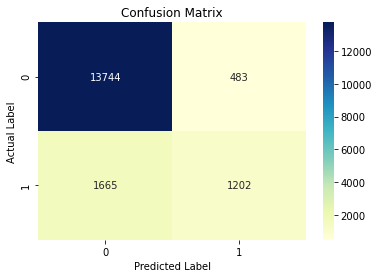

In [ ]:
cnf_matrix = confusion_matrix(y_test,nn_y_pred_test)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# **Summary of all Models**

In [ ]:
print("Testing accuracy of Logistic Regression: ",'%.1f' %(lr_score2),"%")
print("Testing accuracy of Decision Trees: ",'%.1f' %(dt_score2),"%")
print("Testing accuracy of Random Forests: ",'%.1f' %(rf_score2),"%")
print("Testing accuracy of Neutral Network: ",'%.1f' %(history.history['accuracy'][14]*100),"%")

Testing accuracy of Logistic Regression:  85.4 %
Testing accuracy of Decision Trees:  81.9 %
Testing accuracy of Random Forests:  88.0 %
Testing accuracy of Neutral Network:  87.7 %


In [ ]:
model_compare_dict = [{'Model': 'Logistic Regression', 'Test Accuracy(in %)': lr_score},
                 {'Model': 'Decision Trees', 'Test Accuracy(in %)': dt_score2},
                 {'Model': 'Random Forests', 'Test Accuracy(in %)': rf_score2},
                 {'Model': 'Neutral Network', 'Test Accuracy(in %)': history.history['accuracy'][14]*100}]

In [ ]:
model_compare = pd.DataFrame(model_compare_dict)

In [ ]:
model_compare

Model  Test Accuracy(in %)
0  Logistic Regression            85.635356
1       Decision Trees            81.888382
2       Random Forests            87.966538
3      Neutral Network            87.732297

(80.0, 90.0)

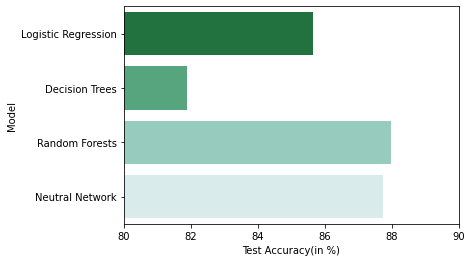

In [ ]:
sns.barplot(y='Model', x='Test Accuracy(in %)', data=model_compare, palette="BuGn_r")
plt.xlim(80,90)